# Project-1. Reduce the time a Mercedes-Benz spends on the test bench.

Data is in terms of zip file and let's extract and begin with the project.

In [1]:
import zipfile

In [2]:
zip_obj_train = zipfile.ZipFile(r"C:\Users\utkri\Downloads\train.zip","r")

In [3]:
zip_obj_train.extractall("train_data")

In [4]:
zip_obj_test = zipfile.ZipFile(r"C:\Users\utkri\Downloads\test.zip","r")

In [5]:
zip_obj_test.extractall("test_data")

Now get the data into dataframe.

## **Step-1: Removing the columns with the variance equal to 0**

In [6]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [7]:
train_data = pd.read_csv(r"train_data\train.csv")

In [8]:
test_data = pd.read_csv(r"test_data\test.csv")

In [9]:
train_data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [10]:
test_data.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


Let's check out for those columns whose variances are zero. Before that let's check out the datatypes. Begin with a one sample

In [11]:
train_data["X0"].dtype

dtype('O')

So the datatype which are objects are denoted by ("O"). Let's exclude these columns and check for the variances of columns with datatype as either integer or float.

In [12]:
for i in range(0,train_data.shape[1]):
    if train_data.iloc[:,i].dtypes !="O":
        if train_data.iloc[:,i].var()==0:
            print(train_data.columns[i])    

X11
X93
X107
X233
X235
X268
X289
X290
X293
X297
X330
X347


Confirming the variances of zero for the above output.

In [13]:
train_data["X11"].var()

0.0

In [14]:
train_data["X93"].var()

0.0

In [15]:
train_data["X347"].var()

0.0

Similarly checking for the variances with "0" in test data.

In [16]:
for i in range(0,test_data.shape[1]):
    if test_data.iloc[:,i].dtypes !="O":
        if test_data.iloc[:,i].var()==0:
            print(test_data.columns[i])    

X257
X258
X295
X296
X369


In [17]:
test_data["X257"].var()

0.0

In [18]:
train_data.iloc[:,3].dtypes

dtype('O')

Let's drop these columns which have zero variances from train and test data both.

In [19]:
train_data.drop(columns=["X11","X93","X107","X233","X235","X257","X258","X268","X289","X293","X295","X296","X297","X330","X347","X369"],inplace=True)

In [20]:
test_data.drop(columns=["X11","X93","X107","X233","X235","X257","X258","X268","X289","X293","X295","X296","X297","X330","X347","X369"],inplace=True)

In [21]:
len(train_data.columns), len(test_data.columns)

(362, 361)

## **Step-2: Check for null and unique values for test and train sets.**

Next task is to check for the null and unique values in train and test data.

Checking for the null values in training dataset.

In [22]:
# trying it on one sample of data.
train_data.iloc[:,0].isna().sum()

0

So let's check for whole training dataset.

In [23]:
for i in range(0,train_data.shape[1]):
    if train_data.iloc[:,i].isna().sum() !=0:
        print(train_data.columns[i]) 
else:
    print("None")

None


Hence there are no null values in training dataset.          

Checking for the null values in test dataset.

In [24]:
for i in range(0,test_data.shape[1]):
    if test_data.iloc[:,i].isna().sum() !=0:
        print(test_data.columns[i]) 
else:
    print("None")

None


Hence, there are no null values in test dataset.

Next step is to check for the unique values in the dataset. Since we have approximately 362 columns, we will use for loop to print the unique values of all the columns.

In [25]:
train_data["y"].unique()

array([130.81,  88.53,  76.26, ...,  85.71, 108.77,  87.48])

Printing unique values in training data.

In [26]:
for i in range(0,train_data.shape[1]):
    print(train_data.iloc[:,i].unique())

[   0    6    7 ... 8412 8415 8417]
[130.81  88.53  76.26 ...  85.71 108.77  87.48]
['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
['a' 'e' 'c' 'f' 'd' 'b' 'g']
['d' 'b' 'c' 'a']
['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b']
['o' 'x' 'e' 'n' 's' 'a' 'h' 'p' 'm' 'k' 'd' 'i' 'v' 'j' 'b' 'q' 'w' 'g'
 'y' 'l' 'f' 'u' 'r' 't' 'c']
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]


Printing unique values for testing data.

In [27]:
for i in range(0,test_data.shape[1]):
    print(test_data.iloc[:,i].unique())

[   1    2    3 ... 8413 8414 8416]
['az' 't' 'w' 'y' 'x' 'f' 'ap' 'o' 'ay' 'al' 'h' 'z' 'aj' 'd' 'v' 'ak'
 'ba' 'n' 'j' 's' 'af' 'ax' 'at' 'aq' 'av' 'm' 'k' 'a' 'e' 'ai' 'i' 'ag'
 'b' 'am' 'aw' 'as' 'r' 'ao' 'u' 'l' 'c' 'ad' 'au' 'bc' 'g' 'an' 'ae' 'p'
 'bb']
['v' 'b' 'l' 's' 'aa' 'r' 'a' 'i' 'p' 'c' 'o' 'm' 'z' 'e' 'h' 'w' 'g' 'k'
 'y' 't' 'u' 'd' 'j' 'q' 'n' 'f' 'ab']
['n' 'ai' 'as' 'ae' 's' 'b' 'e' 'ak' 'm' 'a' 'aq' 'ag' 'r' 'k' 'aj' 'ay'
 'ao' 'an' 'ac' 'af' 'ax' 'h' 'i' 'f' 'ap' 'p' 'au' 't' 'z' 'y' 'aw' 'd'
 'at' 'g' 'am' 'j' 'x' 'ab' 'w' 'q' 'ah' 'ad' 'al' 'av' 'u']
['f' 'a' 'c' 'e' 'd' 'g' 'b']
['d' 'b' 'a' 'c']
['t' 'b' 'a' 'z' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac'
 'ad' 'ae' 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
['a' 'g' 'j' 'l' 'i' 'd' 'f' 'h' 'c' 'k' 'e' 'b']
['w' 'y' 'j' 'n' 'm' 's' 'a' 'v' 'r' 'o' 't' 'h' 'c' 'k' 'p' 'u' 'd' 'g'
 'b' 'q' 'e' 'l' 'f' 'i' 'x']
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[

Let's see the distribution of label data.

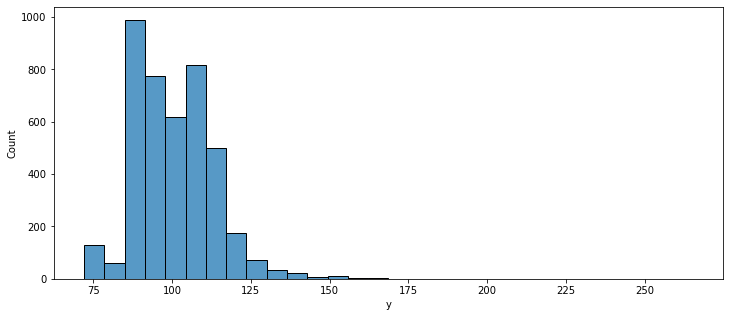

In [28]:
plt.figure(figsize=(12,5))
sns.histplot(data=train_data,x="y",bins=30)
plt.show()

Let's see how the output changes in label column "y".

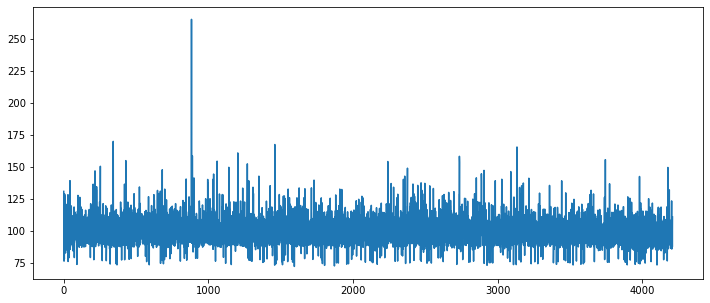

In [29]:
plt.figure(figsize=(12,5))
plt.plot(train_data["y"])
plt.show();

Now we have seen how the value changes over time, let's go to the next step.

## **Step-3: Apply label encoder**

Next step is to apply the label encoder. Let's see how many total type of object category columns we have.

In [30]:
data_type_df = pd.DataFrame(train_data.dtypes,columns=["Data_Type"])

In [31]:
data_type_df[:3]

,Data_Type
ID,int64
y,float64
X0,object


In [32]:
# get the value_counts 
data_type_df["Data_Type"].value_counts()

int64      353
object       8
float64      1
Name: Data_Type, dtype: int64

Let's see which of these 8 are object.

In [33]:
data_type_df.loc[data_type_df["Data_Type"]=="object"]

,Data_Type
X0,object
X1,object
X2,object
X3,object
X4,object
X5,object
X6,object
X8,object


Let's apply label encoder on these 8 columns.

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le = LabelEncoder()

In [36]:
catg_list = ["X0","X1","X2","X3","X4","X5","X6","X8"]

In [37]:
for i in range(len(catg_list)):
    train_data[catg_list[i]] = le.fit_transform(train_data[catg_list[i]])

In [38]:
train_data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,32,23,17,0,3,24,9,14,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,32,21,19,4,3,28,11,14,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,20,24,34,2,3,27,9,23,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,20,21,34,5,3,27,11,4,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,20,23,34,5,3,12,3,13,...,0,0,0,0,0,0,0,0,0,0


Let's check whether we have remaiming any object data or not.

In [39]:
train_data.iloc[:,i].dtype

dtype('int32')

In [40]:
count_obj_col = []
for i in range(0,train_data.shape[1]):
    if train_data.iloc[:,i].dtype=="object":
        count_obj_col.append()
else:
    print("No object data found")

No object data found


Similarly applying this label encoder to test_data.

In [41]:
for i in range(len(catg_list)):
    test_data[catg_list[i]] = le.fit_transform(test_data[catg_list[i]])

In [42]:
test_data.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,21,23,34,5,3,26,0,22,0,...,0,0,0,1,0,0,0,0,0,0
1,2,42,3,8,0,3,9,6,24,0,...,0,0,1,0,0,0,0,0,0,0
2,3,21,23,17,5,3,0,9,9,0,...,0,0,0,1,0,0,0,0,0,0
3,4,21,13,34,5,3,31,11,13,0,...,0,0,0,1,0,0,0,0,0,0
4,5,45,20,17,2,3,30,8,12,0,...,1,0,0,0,0,0,0,0,0,0


Let's further separate the data into X_train and y_train.

In [43]:
X_train = train_data.drop(columns=["ID","y"]).values

In [44]:
X_train.shape

(4209, 360)

In [45]:
y_train = train_data["y"].values

In [46]:
y_train

array([130.81,  88.53,  76.26, ..., 109.22,  87.48, 110.85])

In [47]:
X_test = test_data.drop(columns=["ID"]).values

In [48]:
X_test.shape

(4209, 360)

## **Step-4: Perform dimensionality reduction.**

Before applying PCA, let's scale our data using StandardScaler.

In [49]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [50]:
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [51]:
from sklearn.decomposition import PCA

In [52]:
pca = PCA(n_components=0.95)
pca.fit(X_train_sc)

PCA(n_components=0.95)

In [53]:
pca.n_components_

146

As `explained_variance` tells the amount of variance explained by each of the selected components. Let's see how the variances decreases with as number of components increases.

In [54]:
import matplotlib.pyplot as plt, seaborn as sns

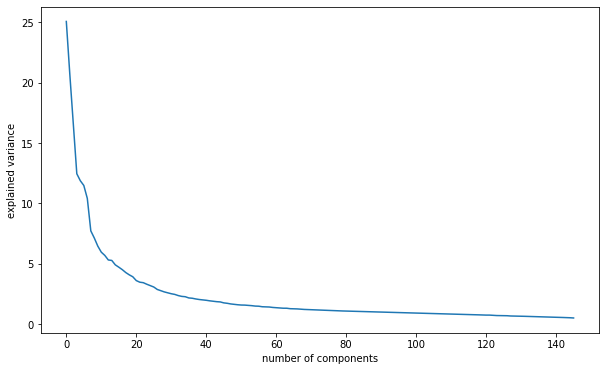

In [55]:
plt.figure(figsize=(10,6))
sns.lineplot(data=pca.explained_variance_)
plt.xlabel("number of components")
plt.ylabel("explained variance")
plt.show();

Another way we can visualize the graph using `explianed_variance_ratio`. In this way we can plot the graph using cumulative explained variance on y-axis, that could helps in understand that which feature explain the most variance in data. With this `explained_variance_ratio`, we can understand the proportion of dataset variance that lies along the axis of each principal component.   

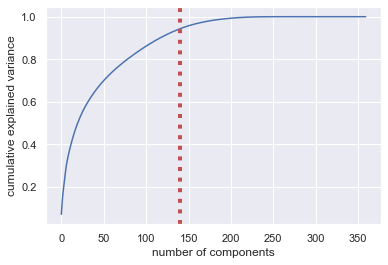

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.069853,0.069853
1,0.127525,0.057672
2,0.173526,0.046001
3,0.208217,0.034692
4,0.241304,0.033086
5,0.273294,0.031991
6,0.302299,0.029005
7,0.323807,0.021508
8,0.343663,0.019856
9,0.361652,0.017988


In [56]:
pca_test = PCA()
pca_test.fit(X_train_sc)

sns.set(style='darkgrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = ':', x=140, ymin=0, ymax=1)
display(plt.show());

evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

So instead of 360 components, we will reduced down our version to 146 components using PCA.  

## **Step-5 Predict test_df values using XGBoost**

Let's fit the PCA with `n_components=146` on our training and test data.

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=146)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)

In [58]:
# check for the shape
X_train_pca.shape, X_test_pca.shape

((4209, 146), (4209, 146))

So, we have reduced the features to 146.

Applying XGBoost to our dataframe.

In [59]:
df_y_train = pd.DataFrame(y_train,columns=["value"])

In [60]:
from xgboost import XGBRegressor

In [61]:
model = XGBRegressor()

In [62]:
model.fit(X_train_pca,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [63]:
yhat = model.predict(X_test_pca)

In [64]:
yhat

array([ 90.51233 , 122.51483 ,  87.30246 , ...,  91.283875, 107.81112 ,
        92.41646 ], dtype=float32)

In [65]:
yhat_df = pd.DataFrame(yhat,columns=["Predicted_Value"])

In [66]:
yhat_df

,Predicted_Value
0,90.512329
1,122.514832
2,87.302460
3,81.731903
4,104.585205
...,...
4204,118.708382
4205,96.463509
4206,91.283875
4207,107.811119
